## TASK 1 (BUILDING A MODEL TO PREDICT WHETHER SOMEONE ON THE TITANIC SURVIVED OR NOT )

#### KPAN MACLEAN FURIKAARA

IMPORTATION OF ALL RELEVANT LIBRARIES NEEDED FOR THE TASK

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

READING THE DATA SET GIVEN FOR THE PROJECT

In [4]:
func = pd.read_csv('Titanic-Dataset.csv')
func.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


USING DESCRIBE FUNCTION TO OBTAIN STATISTICAL VALUES OF THE DATA SET

In [5]:
func.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
func['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

FOR THE ABOVE, 0 MEANS DID NOT SURVIVE AND 1 MEANS SURVIVED

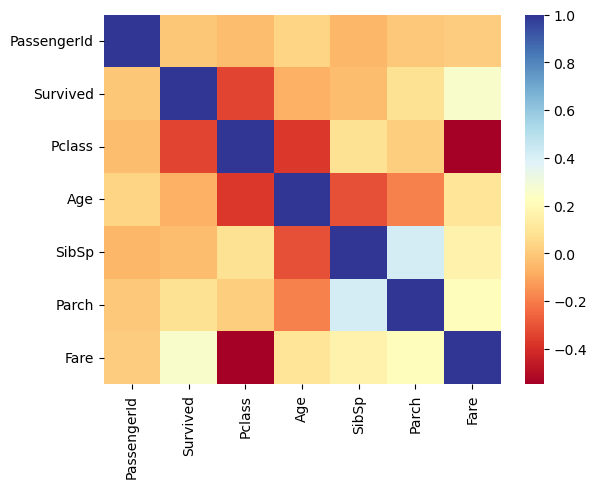

In [7]:
numeric_columns = func.select_dtypes(include=np.number) #checks for numeric columns
sns.heatmap(numeric_columns.corr(), cmap="RdYlBu")
plt.show() #plots the correlation heat map

<Axes: xlabel='Survived', ylabel='count'>

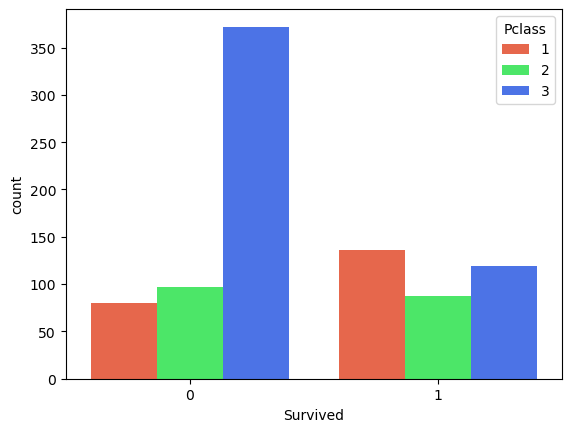

In [18]:
custom_palette = ["#FF5733", "#33FF57", "#3366FF"]
sns.countplot(data=func, x = 'Survived', hue = 'Pclass', palette = custom_palette)


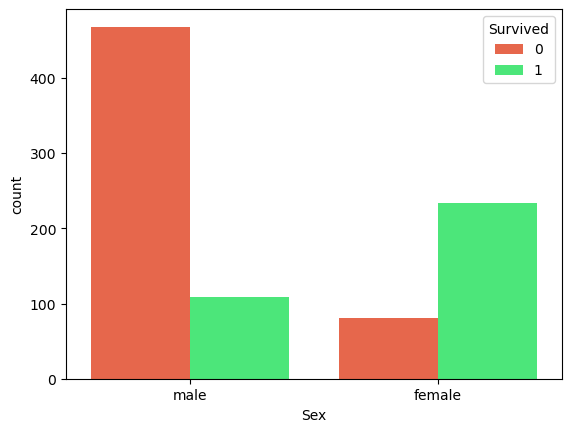

In [19]:
custom_palette_one = ["#FF5733", "#33FF70", "#3366FF"]
sns.countplot(data=func, x = 'Sex', hue = 'Survived', palette = custom_palette_one)
plt.show()

In [20]:
func.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
func['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
func['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [23]:
label_encoder = LabelEncoder()
func['Sex'] = label_encoder.fit_transform(func['Sex'])
func.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [24]:
func['Sex'].unique()

array([1, 0])

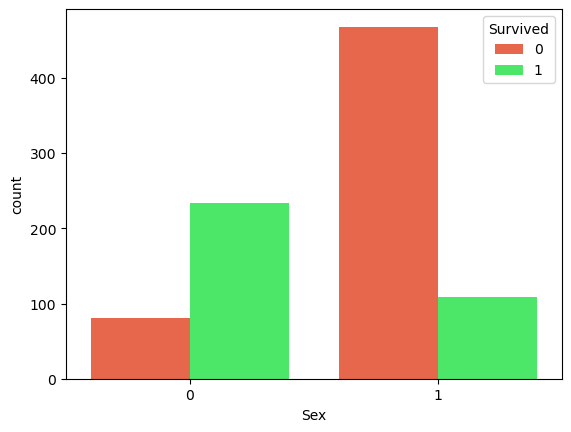

In [25]:
custom_palette = ["#FF5733", "#33FF57"]
sns.countplot(data=func, x = 'Sex', hue = 'Survived', palette = custom_palette)
plt.show()

In [26]:
func_two = func.drop(columns=['Age'])
func_two.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S


In [27]:
X = func[['Pclass','Sex']]
y = func['Survived']

### MACHINE LEARNING MODEL

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 2)
(179, 2)
(712,)
(179,)


In [30]:
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression()

In [31]:
pred = print(logReg.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [32]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


OUTPUT OF THE MODEL

In [33]:
Job = logReg.predict([[3,1]])
if Job == 0:
    print('Did not survive the titanic')
else:
    print('Survived the titanic')

Did not survive the titanic


M:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
